In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers.helper_functions import *

# The Significant Bang Theory

Attention, ADA students!

The Sheldon Cooper we all know and love (OK, some of us might not know him, and some might not love him) from the TV series "The Big Bang Theory" has gotten into an argument with Leonard from the same TV show. Sheldon insists that he knows the show better than anyone, and keeps making various claims about the show, which neither of them know how to prove or disprove. The two of them have reached out to you ladies and gentlemen, as data scientists, to help them. You will be given the full script of the series, with information on the episode, the scene, the person saying each dialogue line, and the dialogue lines themselves.

Leonard has challenged several of Sheldon's claims about the show, and throughout this exam you will see some of those and you will get to prove or disprove them, but remember: sometimes, we can neither prove a claim, nor disprove it!

## Deadline
Wednesday, January 30th, 2019; 11:15 A.M. (Swiss time)

_For the deadline for extramural exams, see the submission subsection._

## Important notes
* Don't forget to add a textual description of your thought process, the assumptions you made, and your results!
* Please write all your comments in English, and use meaningful variable names in your code.
* As we have seen during the semester, data science is all about multiple iterations on the same dataset. Do not obsess over small details in the beginning, and try to complete as many tasks as possible during the first 2 hours. Then, go back to the obtained results, write meaningful comments, and debug your code if you have found any glaring mistake.
* Fully read the instructions for each question before starting to solve it to avoid misunderstandings, and remember to save your notebook often!
* The exam contains **15 questions organised into 4 tasks**, and is designed for more than 3 hours. **You do not need to solve everything in order to get a 6**, and you have some freedom is choosing the tasks you wish to solve.
* You cannot leave the room in the first and last 15 minutes.
* You can use all the online resources you want except for communication tools (emails, web chats, forums, phone, etc.). We will be monitoring the network for unusual activity.
* Remember, this is not a homework assignment -- no teamwork allowed!

## Submission
* Your file has to be named as "NameSurname_SCIPER.ipynb".
* Make sure you upload your Jupyter Notebook (1 file) to [this](https://goo.gl/forms/7GLvYl94uSOn54jH2) Google form at the end of the exam, with all the cells already evaluated (except for the Spark-related question, Q7). You need to sign in to Google using your EPFL credentials in order to submit the form.
* In case of problems with the form, send your Jupyter Notebook (along with your name and SCIPER number) as a direct message to @ramtin on Mattermost. This is reserved only for those who encounter problems with the submission -- you need to have a reasonable justification for using this back-up.
* You will have until 11:20 (strict deadline) to turn in your submission. **Late submissions will not be accepted.** This deadline is for the students taking the exam at EPFL -- students taking the exam extramurally will have their submission deadline as the starting time of the exam plus 3 hours and 5 minutes.

## Task A: Picking up the shovel (10 points)

**Note: You will use the data you preprocess in this task in all the subsequent ones.**

Our friends' argument concerns the entire show. We have given you a file in the `data/` folder that contains the script of every single episode. New episodes are indicated by '>>', new scenes by '>', and the rest of the lines are dialogue lines. Some lines are said by multiple people (for example, lines indicated by 'All' or 'Together'); **you must discard these lines**, for the sake of simplicity. However, you do not need to do it for Q1 in this task -- you'll take care of it when you solve Q2.

**Q1**. (5 points) Your first task is to extract all lines of dialogue in each scene and episode, creating a dataframe where each row has the episode and scene where a dialogue line was said, the character who said it, and the line itself. You do not need to extract the proper name of the episode (e.g. episode 1 can appear as "Series 01 Episode 01 - Pilot Episode", and doesn't need to appear as "Pilot Episode"). Then, answer the following question: In total, how many scenes are there in each season? We're not asking about unique scenes; the same location appearing in two episodes counts as two scenes. You can use a Pandas dataframe with a season column and a scene count column as the response.

**Note: The data refers to seasons as "series".**

In [2]:
fpath = './data/all_scripts.txt'
with open(fpath, 'r') as file:
    scripts = pd.DataFrame(file.readlines(), columns=['lines'])
scripts.head()

,lines
0,>> Series 01 Episode 01 – Pilot Episode\n
1,> A corridor at a sperm bank.\n
2,Sheldon: So if a photon is directed through a ...
3,"Leonard: Agreed, what’s your point?\n"
4,"Sheldon: There’s no point, I just think it’s a..."


In [3]:
scripts.loc[scripts.lines.str.startswith('>>'), 'episode'] = scripts.lines[scripts.lines.str.startswith('>>')].str.strip('\n> ')
scripts.loc[scripts.lines.str.startswith('> '), 'location'] = scripts.lines[scripts.lines.str.startswith('> ')].str.strip('\n> ')
scripts.fillna(method='pad', inplace=True)
dropped = scripts.drop(scripts[scripts.lines.str.startswith('>')].index)
dropped

,lines,episode,location
2,Sheldon: So if a photon is directed through a ...,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
3,"Leonard: Agreed, what’s your point?\n",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
4,"Sheldon: There’s no point, I just think it’s a...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
5,Leonard: Excuse me?\n,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
6,Receptionist: Hang on.\n,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
7,"Leonard: One across is Aegean, eight down is N...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
8,Receptionist: Can I help you?\n,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
9,"Leonard: Yes. Um, is this the High IQ sperm ba...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
10,"Receptionist: If you have to ask, maybe you sh...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.
11,Sheldon: I think this is the place.\n,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.


In [4]:
def scenes(df):
    mask = df.location != df.location.shift()
    nums = range(mask.sum())
    df.loc[mask, 'scene'] = nums
    df.fillna(method='pad', inplace=True)
    return df.astype({'scene': int})

dropped = dropped.groupby('episode').apply(scenes)
dropped['season'] = dropped.episode.str.extract(r"Series (\d+)")
splitlines = dropped.lines.str.extract(r"(.*?): (.*)")
dropped['character'] = splitlines[0]
dropped.lines = splitlines[1]
dropped

,lines,episode,location,scene,season,character
2,So if a photon is directed through a plane wit...,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Sheldon
3,"Agreed, what’s your point?",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Leonard
4,"There’s no point, I just think it’s a good ide...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Sheldon
5,Excuse me?,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Leonard
6,Hang on.,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Receptionist
7,"One across is Aegean, eight down is Nabakov, t...",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Leonard
8,Can I help you?,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Receptionist
9,"Yes. Um, is this the High IQ sperm bank?",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Leonard
10,"If you have to ask, maybe you shouldn’t be here.",Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Receptionist
11,I think this is the place.,Series 01 Episode 01 – Pilot Episode,A corridor at a sperm bank.,0,01,Sheldon


### Number of scenes

In [5]:
scenes = pd.DataFrame(dropped.groupby('episode').scene.max() + 1).reset_index()
scenes['season'] = scenes.episode.str.extract(r"Series (\d+)")
scenes.groupby('season').scene.sum()

season
01    160
02    231
03    236
04    279
05    254
06    304
07    332
08    327
09    337
10    346
Name: scene, dtype: int64

**Q2**. (5 points) Now, let's define two sets of characters: all the characters, and recurrent characters. Recurrent characters are those who appear in more than one episode. For the subsequent sections, you will need to have a list of recurrent characters. Assume that there are no two _named characters_ (i.e. characters who have actual names and aren't referred to generically as "little girl", "grumpy grandpa", etc.) with the same name, i.e. there are no two Sheldons, etc. Generate a list of recurrent characters who have more than 90 dialogue lines in total, and then take a look at the list you have. If you've done this correctly, you should have a list of 20 names. However, one of these is clearly not a recurrent character. Manually remove that one, and print out your list of recurrent characters. To remove that character, pay attention to the _named character_ assumption we gave you earlier on. **For all the subsequent questions, you must only keep the dialogue lines said by the recurrent characters in your list.**

_Hint: "I know all the recurrent characters because I've watched the entire series five times" is not an acceptable argument, so you need to actually generate the list._

In [6]:
nscenes = dropped.groupby('character').episode.nunique()
recurrent = nscenes[nscenes > 1].index.to_list()
for c in ['All', 'Assistant', 'Barman', 'Both', 'Doctor', 'Everyone', 'Female Voice', 'Girl', 'Girls', 
 'Guy', 'Man', 'Man on TV', 'Nurse', 'Policeman', 'Receptionist', 'Security Guard', 'Together', 'Voice', 'Waiter', 'Waitress', 'Woman', 'Woman on TV']:
    try:
        recurrent.remove(c)
    except:
        print(c)
print(f"{len(recurrent)} recurring characters.")

62 recurring characters.


In [7]:
nlines = dropped[dropped.character.isin(recurrent)].character.value_counts()
characters = nlines[nlines > 90].index.to_list()
filtered = dropped[dropped.character.isin(characters)].copy()
nlines[nlines > 90]

Sheldon         11689
Leonard          9829
Penny            7677
Howard           5872
Raj              4779
Amy              3472
Bernadette       2690
Stuart            733
Priya             222
Mrs Cooper        213
Emily             164
Beverley          162
Mrs Wolowitz      136
Zack              135
Arthur            130
Wil               126
Leslie            116
Kripke            106
Bert               95
Name: character, dtype: int64

## Task B: Read the ~~stats~~ scripts carefully (30 points)

### Part 1: Don't put the shovel down just yet

**Q3**. (2.5 points) From each dialogue line, replace punctuation marks (listed in the EXCLUDE_CHARS variable provided in `helpers/helper_functions.py`) with whitespaces, and lowercase all the text. **Do not remove any stopwords, leave them be for all the questions in this task.**

In [8]:
for c in EXCLUDE_CHARS:
    filtered.lines = filtered.lines.str.replace(c, ' ', regex=False)
filtered.lines = filtered.lines.str.lower()

**Q4**. (5 points) For each term, calculate its "corpus frequency", i.e. its number of occurrences in the entire series. Visualize the distribution of corpus frequency using a histogram. Explain your observations. What are the appropriate x and y scales for this plot?

In [9]:
from collections import Counter

In [10]:
c = Counter()
for l in filtered.lines.values:
    c.update([s.strip() for s in l.split(' ') if s != ''])
terms = pd.Series(c).sort_values(ascending=False)
terms

i               24764
you             22977
the             15110
to              14295
a               13518
s               12105
it              11182
and              8784
that             8526
t                7617
of               7335
in               5676
is               5444
we               5293
what             5206
me               4905
my               4810
m                4797
on               4297
re               4105
oh               4098
this             4080
with             3945
have             3907
no               3814
not              3762
for              3748
your             3604
know             3505
do               3456
                ...  
incest              1
cutbacks            1
broth               1
cupboard            1
sleazebag           1
50s                 1
sparta              1
athens              1
stargate            1
mrow                1
snootful            1
operatin            1
stwings             1
wriggles            1
impwicatio

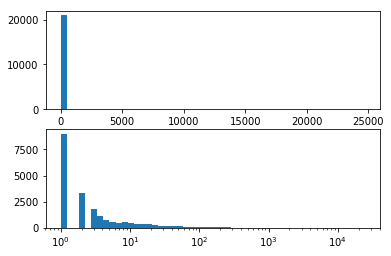

In [11]:
plt.subplot(211)
hist, bins, _ = plt.hist(terms, bins=50)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(terms, bins=logbins)
plt.xscale('log')
plt.show()

### Part 2: Talkativity
**Q5**. (2.5 points) For each of the recurrent characters, calculate their total number of words uttered across all episodes. Based on this, who seems to be the most talkative character?

In [12]:
filtered['nwords'] = filtered.lines.apply(lambda x: len([s.strip() for s in x.split(' ') if s != '']))
filtered.groupby('character').nwords.sum().sort_values(ascending=False)

character
Sheldon         185393
Leonard         102498
Penny            79272
Howard           69505
Raj              60099
Amy              39933
Bernadette       27726
Stuart            7955
Mrs Cooper        3389
Beverley          2029
Priya             1940
Wil               1678
Emily             1571
Mrs Wolowitz      1459
Arthur            1451
Zack              1427
Leslie            1249
Kripke            1246
Bert              1146
Name: nwords, dtype: int64

**Q6**. (12.5 points) For each of the recurrent characters, calculate their total number of words uttered per episode (ignoring episodes that the character does not appear in), and calculate a **robust summary statistic** for the word count distribution of each person.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (2.5 points) What changes do you observe, compared to the analysis in Q5?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (2.5 points) Why is this analysis an improvement over the previous one, and how could you improve it even further? _Hint: The improvement involves making your unit for word counts even more granular - you can go further down than episodes._

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (7.5 points) Incorporate that improvement. Do you still see the same results? How **confident** can you be that the "most talkative" person given by this twice improved method is really more talkative than the second most talkative one? _Hint: Read the question again. A good idea would be to use bootstrapping and calculate your summary statistic on each bootstrapped set._

In [13]:
word_counts = filtered.groupby(['episode', 'character']).nwords.sum().unstack().T.astype('Int64')
word_counts

episode,Series 01 Episode 01 – Pilot Episode,Series 01 Episode 02 – The Big Bran Hypothesis,Series 01 Episode 03 – The Fuzzy Boots Corollary,Series 01 Episode 04 – The Luminous Fish Effect,Series 01 Episode 05 – The Hamburger Postulate,Series 01 Episode 06 – The Middle Earth Paradigm,Series 01 Episode 07 – The Dumpling Paradox,Series 01 Episode 08 – The Grasshopper Experiment,Series 01 Episode 09 – The Cooper-Hofstadter Polarization,Series 01 Episode 10 – The Loobenfeld Decay,...,Series 10 Episode 15 – The Locomotion Reverberation,Series 10 Episode 16 – The Allowance Evaporation,Series 10 Episode 17 – The Comic-Con Conundrum,Series 10 Episode 18 – The Escape Hatch Identification,Series 10 Episode 19 – The Collaboration Fluctuation,Series 10 Episode 20 – The Recollection Dissipation,Series 10 Episode 21 – The Separation Agitation,Series 10 Episode 22 – The Cognition Regeneration,Series 10 Episode 23 – The Gyroscopic Collapse,Series 10 Episode 24 – The Long Distance Dissonance
character,,,,,,,,,,,,,,,,,,,,,
Amy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,253,329,224,284,516,212,199,256,478,244
Arthur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bernadette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,291,84,188,107,114,309,295,309,243,133
Bert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,157,NaN,NaN,NaN,NaN,267,NaN,NaN,NaN
Beverley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,184,NaN,NaN,NaN,NaN,NaN,NaN
Emily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Howard,220,229,313,46,125,259,339,291,275,88,...,372,178,331,306,126,439,306,349,241,133
Kripke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leonard,1180,994,1440,428,747,757,611,367,952,625,...,458,175,521,365,322,154,148,505,283,217


In [14]:
normalized = word_counts.div(word_counts.sum())
normalized

episode,Series 01 Episode 01 – Pilot Episode,Series 01 Episode 02 – The Big Bran Hypothesis,Series 01 Episode 03 – The Fuzzy Boots Corollary,Series 01 Episode 04 – The Luminous Fish Effect,Series 01 Episode 05 – The Hamburger Postulate,Series 01 Episode 06 – The Middle Earth Paradigm,Series 01 Episode 07 – The Dumpling Paradox,Series 01 Episode 08 – The Grasshopper Experiment,Series 01 Episode 09 – The Cooper-Hofstadter Polarization,Series 01 Episode 10 – The Loobenfeld Decay,...,Series 10 Episode 15 – The Locomotion Reverberation,Series 10 Episode 16 – The Allowance Evaporation,Series 10 Episode 17 – The Comic-Con Conundrum,Series 10 Episode 18 – The Escape Hatch Identification,Series 10 Episode 19 – The Collaboration Fluctuation,Series 10 Episode 20 – The Recollection Dissipation,Series 10 Episode 21 – The Separation Agitation,Series 10 Episode 22 – The Cognition Regeneration,Series 10 Episode 23 – The Gyroscopic Collapse,Series 10 Episode 24 – The Long Distance Dissonance
character,,,,,,,,,,,,,,,,,,,,,
Amy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.092810,0.130711,0.079348,0.094446,0.214464,0.083137,0.085298,0.087852,0.190666,0.118908
Arthur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bernadette,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.106750,0.033373,0.066596,0.035584,0.047382,0.121176,0.126447,0.106040,0.096929,0.064815
Bert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.062376,NaN,NaN,NaN,NaN,0.114445,NaN,NaN,NaN
Beverley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.061191,NaN,NaN,NaN,NaN,NaN,NaN
Emily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Howard,0.070717,0.078184,0.110954,0.016899,0.060621,0.107424,0.123004,0.110520,0.101177,0.033768,...,0.136464,0.070719,0.117251,0.101763,0.052369,0.172157,0.131162,0.119767,0.096131,0.064815
Kripke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Leonard,0.379299,0.339365,0.510457,0.157237,0.362270,0.313978,0.221698,0.139385,0.350258,0.239831,...,0.168012,0.069527,0.184555,0.121383,0.133832,0.060392,0.063438,0.173301,0.112884,0.105750


In [15]:
normalized.median(axis=1).sort_values(ascending=False).reset_index()

,character,0
0,Sheldon,0.297739
1,Leonard,0.157237
2,Arthur,0.127019
3,Penny,0.126477
4,Howard,0.108831
5,Mrs Cooper,0.101122
6,Amy,0.091697
7,Beverley,0.088801
8,Raj,0.087970
9,Bert,0.074655


For comparison:

In [16]:
filtered.groupby('character').nwords.sum().sort_values(ascending=False).reset_index()

,character,nwords
0,Sheldon,185393
1,Leonard,102498
2,Penny,79272
3,Howard,69505
4,Raj,60099
5,Amy,39933
6,Bernadette,27726
7,Stuart,7955
8,Mrs Cooper,3389
9,Beverley,2029


### (ii)

In [17]:
by_scenes = filtered.groupby(['episode', 'character', 'scene']).nwords.sum().unstack(level=[0,2])
bs_norm = by_scenes.div(by_scenes.sum())
bs_norm

episode      Series 01 Episode 01 – Pilot Episode                             \
scene                                          2      5         10        11   
character                                                                      
Amy                                           NaN    NaN       NaN       NaN   
Arthur                                        NaN    NaN       NaN       NaN   
Bernadette                                    NaN    NaN       NaN       NaN   
Bert                                          NaN    NaN       NaN       NaN   
Beverley                                      NaN    NaN       NaN       NaN   
Emily                                         NaN    NaN       NaN       NaN   
Howard                                   0.084681  0.475  0.278351  0.284615   
Kripke                                        NaN    NaN       NaN       NaN   
Leonard                                  0.334873    NaN  0.175258  0.053846   
Leslie                                        NaN    NaN       NaN       NaN   
Mrs Cooper                                    NaN    NaN       NaN       NaN   
Mrs Wolowitz                                  NaN    NaN       NaN       NaN   
Penny                                    0.244804  0.525  0.417526  0.146154   
Priya                                         NaN    NaN       NaN       NaN   
Raj                                      0.003849    NaN  0.005155       NaN   
Sheldon                                  0.331794    NaN  0.123711  0.515385   
Stuart                                        NaN    NaN       NaN       NaN   
Wil                                           NaN    NaN       NaN       NaN   
Zack                                          NaN    NaN       NaN       NaN   

episode                                                                 ...  \
scene              0         1         3        4         6         7   ...   
character                                                               ...   
Amy               NaN       NaN       NaN      NaN       NaN       NaN  ...   
Arthur            NaN       NaN       NaN      NaN       NaN       NaN  ...   
Bernadette        NaN       NaN       NaN      NaN       NaN       NaN  ...   
Bert              NaN       NaN       NaN      NaN       NaN       NaN  ...   
Beverley          NaN       NaN       NaN      NaN       NaN       NaN  ...   
Emily             NaN       NaN       NaN      NaN       NaN       NaN  ...   
Howard            NaN       NaN       NaN      NaN       NaN       NaN  ...   
Kripke            NaN       NaN       NaN      NaN       NaN       NaN  ...   
Leonard       0.37931  0.507692  0.597701  0.39313  0.657534  0.542857  ...   
Leslie            NaN       NaN       NaN      NaN       NaN       NaN  ...   
Mrs Cooper        NaN       NaN       NaN      NaN       NaN       NaN  ...   
Mrs Wolowitz      NaN       NaN       NaN      NaN       NaN       NaN  ...   
Penny             NaN  0.125275  0.402299      NaN       NaN       NaN  ...   
Priya             NaN       NaN       NaN      NaN       NaN       NaN  ...   
Raj               NaN       NaN       NaN      NaN       NaN       NaN  ...   
Sheldon       0.62069  0.367033       NaN  0.60687  0.342466  0.457143  ...   
Stuart            NaN       NaN       NaN      NaN       NaN       NaN  ...   
Wil               NaN       NaN       NaN      NaN       NaN       NaN  ...   
Zack              NaN       NaN       NaN      NaN       NaN       NaN  ...   

episode      Series 10 Episode 24 – The Long Distance Dissonance            \
scene                                                         7         8    
character                                                                    
Amy                                                         NaN        NaN   
Arthur                                                      NaN        NaN   
Bernadette                                             0.177215   0.095238   
Bert                            

In [18]:
bs_norm.median(axis=1).sort_values(ascending=False).reset_index()

,character,0
0,Sheldon,0.475352
1,Beverley,0.440806
2,Mrs Cooper,0.428994
3,Arthur,0.369317
4,Penny,0.278013
5,Zack,0.271186
6,Amy,0.266129
7,Howard,0.259016
8,Leonard,0.258759
9,Emily,0.249415


For comparison:

In [19]:
normalized.median(axis=1).sort_values(ascending=False).reset_index()

,character,0
0,Sheldon,0.297739
1,Leonard,0.157237
2,Arthur,0.127019
3,Penny,0.126477
4,Howard,0.108831
5,Mrs Cooper,0.101122
6,Amy,0.091697
7,Beverley,0.088801
8,Raj,0.087970
9,Bert,0.074655


### Using bootstrapping

In [20]:
by_scenes

episode      Series 01 Episode 01 – Pilot Episode                           \
scene                                          2     5     10    11     0    
character                                                                    
Amy                                           NaN   NaN   NaN   NaN    NaN   
Arthur                                        NaN   NaN   NaN   NaN    NaN   
Bernadette                                    NaN   NaN   NaN   NaN    NaN   
Bert                                          NaN   NaN   NaN   NaN    NaN   
Beverley                                      NaN   NaN   NaN   NaN    NaN   
Emily                                         NaN   NaN   NaN   NaN    NaN   
Howard                                      110.0  19.0  54.0  37.0    NaN   
Kripke                                        NaN   NaN   NaN   NaN    NaN   
Leonard                                     435.0   NaN  34.0   7.0  121.0   
Leslie                                        NaN   NaN   NaN   NaN    NaN   
Mrs Cooper                                    NaN   NaN   NaN   NaN    NaN   
Mrs Wolowitz                                  NaN   NaN   NaN   NaN    NaN   
Penny                                       318.0  21.0  81.0  19.0    NaN   
Priya                                         NaN   NaN   NaN   NaN    NaN   
Raj                                           5.0   NaN   1.0   NaN    NaN   
Sheldon                                     431.0   NaN  24.0  67.0  198.0   
Stuart                                        NaN   NaN   NaN   NaN    NaN   
Wil                                           NaN   NaN   NaN   NaN    NaN   
Zack                                          NaN   NaN   NaN   NaN    NaN   

episode                                       ...  \
scene            1     3      4     6     7   ...   
character                                     ...   
Amy             NaN   NaN    NaN   NaN   NaN  ...   
Arthur          NaN   NaN    NaN   NaN   NaN  ...   
Bernadette      NaN   NaN    NaN   NaN   NaN  ...   
Bert            NaN   NaN    NaN   NaN   NaN  ...   
Beverley        NaN   NaN    NaN   NaN   NaN  ...   
Emily           NaN   NaN    NaN   NaN   NaN  ...   
Howard          NaN   NaN    NaN   NaN   NaN  ...   
Kripke          NaN   NaN    NaN   NaN   NaN  ...   
Leonard       231.0  52.0  103.0  96.0  19.0  ...   
Leslie          NaN   NaN    NaN   NaN   NaN  ...   
Mrs Cooper      NaN   NaN    NaN   NaN   NaN  ...   
Mrs Wolowitz    NaN   NaN    NaN   NaN   NaN  ...   
Penny          57.0  35.0    NaN   NaN   NaN  ...   
Priya           NaN   NaN    NaN   NaN   NaN  ...   
Raj             NaN   NaN    NaN   NaN   NaN  ...   
Sheldon       167.0   NaN  159.0  50.0  16.0  ...   
Stuart          NaN   NaN    NaN   NaN   NaN  ...   
Wil             NaN   NaN    NaN   NaN   NaN  ...   
Zack            NaN   NaN    NaN   NaN   NaN  ...   

episode      Series 10 Episode 24 – The Long Distance Dissonance               \
scene                                                         7      8     10   
character                                                                       
Amy                                                         NaN     NaN   NaN   
Arthur                                                      NaN     NaN   NaN   
Bernadette                                                 14.0    20.0  12.0   
Bert                                                        NaN     NaN   NaN   
Beverley                                                    NaN     NaN   NaN   
Emily                                                       NaN     NaN   NaN   
Howard                                                      NaN     NaN   8.0   
Kripke                                                      NaN     NaN   NaN   
Leonard                                                     7.0    27.0  10.0   
Leslie                                                      NaN     NaN   NaN   
Mrs Cooper                                                  NaN

In [21]:
scene_counts = {c: by_scenes.loc[c][by_scenes.loc[c].notna()].values for c in characters}
scene_counts

{'Sheldon': array([431.,  24.,  67., ..., 124.,  59.,  16.]),
 'Leonard': array([435.,  34.,   7., ..., 121.,  45.,   7.]),
 'Penny': array([318.,  21.,  81., ...,  30.,   4.,  90.]),
 'Howard': array([110.,  19.,  54., ...,  79.,  37.,   9.]),
 'Raj': array([ 5.,  1.,  9., ..., 66., 43., 33.]),
 'Amy': array([103.,  36., 107., 132., 128., 145.,  66.,   2.,  92.,   6.,  98.,
         33., 116., 161.,  11.,  77., 189.,  48.,  96., 164., 128., 126.,
         13., 114.,  13.,  49.,  14.,   3., 110.,  16.,  43., 123., 176.,
        214.,  26.,  64.,  33., 184.,  86., 132., 117.,  23.,  93., 159.,
         24.,  37.,  55.,  25.,   8.,  38.,  35.,  16., 236.,  59.,  90.,
        261., 142.,  85., 156.,  98.,  81., 104., 170., 142.,  38.,  62.,
        170.,  75., 197.,   1., 219.,  45.,  19.,  50.,  35., 100., 147.,
         90., 132., 170., 105., 190.,  91.,  37.,  49.,  48.,  90.,  56.,
         78.,  32., 120.,  58.,  10.,  46., 116., 113.,  15., 113.,  14.,
         32.,  47.,  71.,   6.

In [22]:
bootstrapped = np.array([np.random.choice(scene_counts[c], size=100000) for c in characters]).T
bootstrapped.shape

(100000, 19)

In [23]:
norm = pd.DataFrame(bootstrapped / bootstrapped.sum(axis=1, keepdims=True), columns=characters)

In [24]:
means = norm.mean(axis=0).sort_values(ascending=False)
means

Mrs Cooper      0.094742
Sheldon         0.088933
Arthur          0.075189
Beverley        0.072381
Leslie          0.056745
Penny           0.054721
Leonard         0.054602
Howard          0.049887
Kripke          0.049871
Wil             0.049019
Raj             0.048374
Zack            0.047558
Amy             0.046945
Bernadette      0.038973
Bert            0.038515
Priya           0.038013
Stuart          0.037576
Emily           0.032853
Mrs Wolowitz    0.025102
dtype: float64

In [25]:
norm.std(axis=0).loc[means.index]

Mrs Cooper      0.059314
Sheldon         0.059352
Arthur          0.043517
Beverley        0.051202
Leslie          0.046578
Penny           0.041022
Leonard         0.043621
Howard          0.037101
Kripke          0.027538
Wil             0.044563
Raj             0.037540
Zack            0.032725
Amy             0.038763
Bernadette      0.030269
Bert            0.022674
Priya           0.035194
Stuart          0.029393
Emily           0.024378
Mrs Wolowitz    0.024965
dtype: float64

Showing 68% confidence intervals

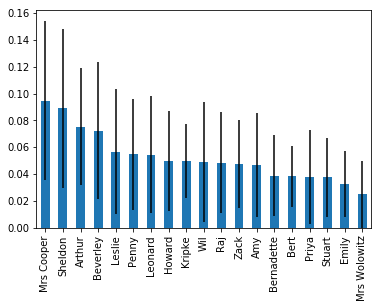

In [26]:
means.plot.bar(yerr=norm.std(axis=0));

### Part 3: Obligatory Spark cameo
**Q7**. (7.5 points) Write a Spark script that does the following: Given the raw input file and your list of recurrent characters, create an RDD containing (speaker, dialogue line) rows **only for the recurrent characters** (assume that you already have the list --  no need to calculate it using Spark), and then generate a vectorized bag of words representation for each dialogue line, thus generating an RDD with (speaker, bag of words vector) rows. Then, calculate an aggregated bag of words vector (sum of all vectors) for each person. The final output is therefore an RDD with each of its rows being (speaker, aggregated bag of words vector). For your bag of words vectors, you can use $1\times|V|$ scipy CSR matrices (where $|V|$ is the size of the vocabulary). No filtering of the vocabulary is necessary for this part.

You do not need to run this script, but you do need to use Spark logic and also, the syntax needs to be correct.

In [27]:
import pyspark, os
from pyspark.sql import *
import pyspark.sql.functions as F
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

conf = pyspark.SparkConf().setMaster("local[*]").setAll([
                                   ('spark.executor.memory', '1G'),  # find
                                   ('spark.driver.memory','4g'), # your
                                   #('spark.driver.maxResultSize', '2G') # setup
                                  ])
# create the session
spark = SparkSession.builder.config(conf=conf).getOrCreate()

# create the context
sc = spark.sparkContext
sqlContext = SQLContext(sc)

# FIX for Spark 2.x
locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

ModuleNotFoundError: No module named 'pyspark'

## Task C: The Gossip Graph (30 points)

**Note: Only for this task, discard the recurrent characters whose names are not single words, e.g. Mrs. Cooper.**

Let us define _gossip_ as follows: if a dialogue line of character A mentions B by name in a scene that does not involve character B, we say that “A gossips about B” in that line. Multiple mentions of the same person in a single line are counted once, but a character can gossip about several others in the same line. For the sake of simplicity, we only consider gossips where the name of the recurrent character is mentioned as it appears in our list of characters; for example, if someone says "Cooper" and they mean Sheldon, we discard that.

**Q8**. (12.5 points) Create the two following graphs first:

1. (5 points) Create the _familiarity graph_, an undirected weighted graph, in which there is a node for each recurrent character, and an edge between two characters if they appear together in at least one scene. The weight of the edge between them is the number of scenes they appear in together. If an edge exists between two people in the familiarity graph, we say that they "know each other".
2. (7.5 points) Create the _gossip graph_, which is a directed weighted graph, in which there there is a node for each recurrent character, and a directed edge from the node for A to the node for B if A has gossiped about B at least once. The weight of the edge is the number of scenes in which A has gossiped about B.

_Hint: You can create each graph first as an adjacency matrix and then create a networkx graph out of that._

In [28]:
sc_char = list(by_scenes.T.apply(lambda S: S[S.notna()].index.to_list(), axis=1).values)
sc_char[:3]

[['Howard', 'Leonard', 'Penny', 'Raj', 'Sheldon'],
 ['Howard', 'Penny'],
 ['Howard', 'Leonard', 'Penny', 'Raj', 'Sheldon']]

In [29]:
def count_occ(a, b):
    return sum([True for l in sc_char if a in l and b in l])

In [30]:
weights = pd.DataFrame(columns=['a', 'b', 'weight'])
for i, a in enumerate(characters):
    for b in characters[i+1:]:
        n = count_occ(a,b)
        weights = weights.append(dict(a=a, b=b, weight=n), ignore_index=True)
nonzero = weights[weights.weight > 0]

In [31]:
import networkx as nx
G = nx.from_pandas_edgelist(nonzero, 'a', 'b', 'weight')

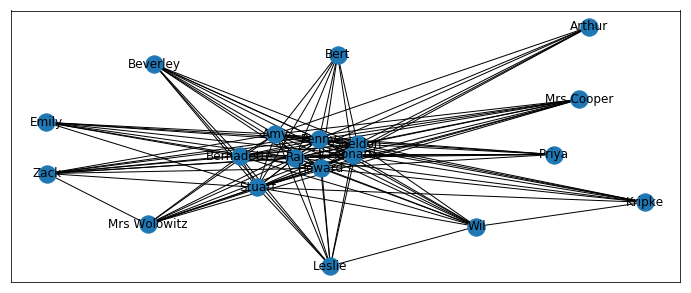

In [32]:
durations = [i['weight'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G, pos, width=1, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)

In [33]:
C = [c.lower() for c in characters]
C
filtered['not_present'] = np.nan

In [34]:
def not_present(df):
    present = df.character.str.lower().unique()
    not_present = [[c for c in C if not c in present]]
    df.not_present = len(df) * not_present
    return df

filtered = filtered.groupby(['episode', 'scene']).apply(not_present)

In [66]:
def get_mentions(df):
    not_present = df.iloc[0].not_present
    df['gossip'] = df.lines.apply(lambda x: sorted(set([w for w in x.split(' ') if w in not_present])))
    return df
    
    
gossip = filtered.groupby(['episode', 'scene']).apply(get_mentions)
gossip.gossip.value_counts()

[]                                           46429
[leonard]                                      332
[penny]                                        273
[sheldon]                                      247
[amy]                                          222
[howard]                                       138
[raj]                                          126
[bernadette]                                   124
[emily]                                         64
[stuart]                                        57
[wil]                                           38
[priya]                                         33
[kripke]                                        31
[zack]                                          24
[bernadette, howard]                            22
[bert]                                          16
[leonard, penny]                                15
[leonard, sheldon]                              14
[leslie]                                        11
[howard, sheldon]              

In [69]:
def gossip_graph(df):
    c = Counter()
    c.update([e for l in df.gossip.values for e in l])
    return pd.Series(c)

#gossip.character = gossip.character.str.lower()
edge_list = gossip.groupby('character').apply(gossip_graph).reset_index()
edge_list.columns = ['from', 'to', 'weight']
edge_list.to = edge_list.to.str.capitalize()
edge_list.head(10)

,from,to,weight
0,Amy,Leonard,39
1,Amy,Bernadette,15
2,Amy,Penny,27
3,Amy,Zack,9
4,Amy,Sheldon,73
5,Amy,Priya,7
6,Amy,Raj,2
7,Amy,Howard,14
8,Amy,Wil,3
9,Amy,Kripke,5


In [70]:
GOSSIP = nx.from_pandas_edgelist(edge_list, 'from', 'to', 'weight')

In [71]:
list(GOSSIP.nodes)

['Amy',
 'Leonard',
 'Bernadette',
 'Penny',
 'Zack',
 'Sheldon',
 'Priya',
 'Raj',
 'Howard',
 'Wil',
 'Kripke',
 'Arthur',
 'Stuart',
 'Bert',
 'Emily',
 'Beverley',
 'Leslie',
 'Mrs Cooper',
 'Mrs Wolowitz']

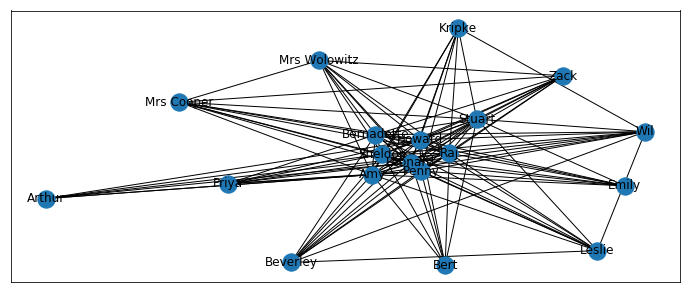

In [73]:
durations = [i['weight'] for i in dict(GOSSIP.edges).values()]

labels = {i:i for i in list(GOSSIP.nodes)}

fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True)
nx.draw_networkx_edges(G, pos, width=1, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)

Now, answer the following questions:

**Q9**. (5 points) Sheldon claims that every character in the show is familiar with everyone else through at most one intermediary. Based on the familiarity graph, is this true? If not, at most how many intermediaries are needed?

In [ ]:
weights['distance'] = weights.apply(lambda r: nx.shortest_path_length(G, r.a, r.b), axis=1)

In [ ]:
weights.distance.value_counts()

**Q10**. (5 points) Who is the character through whom the largest number of these indirect familiarities happen? Calculate an appropriate centrality metric on the familiarity graph to answer this question. You can use the package networkx for this section.

In [ ]:
closeness = {}
for c in characters:
    farness = sum(nx.shortest_path_length(G, b, c) for b in characters if b != c)
    closeness[c] = 1/farness
closeness

**Q11**. (2.5 points) Another claim of Sheldon's is that every recurrent character in the show gossips about all the other recurrent characters. What property of the gossip graph would correspond to this? Does the gossip graph possess that property? If not, then is it the case that for every pair of recurrent characters, at least one gossips about the other? What property would this correspond to?

**Q12**. (5 points) Use the gossip graph and the familiarity graph to figure out if for every pair of recurrent characters, one of them has gossiped about the other if and only if they know each other. Explain your method - the simpler, the better.

## Task D: The Detective's Hat (30 points)

Sheldon claims that given a dialogue line, he can, with an accuracy of above 70%, say whether it's by himself or by someone else. Leonard contests this claim, since he believes that this claimed accuracy is too high. Leonard also suspects that it's easier for Sheldon to distinguish the lines that _aren't_ his, rather than those that _are_. We want you to put on the (proverbial) detective's hat and to investigate this claim.

**Q13**. (7.5 points) Divide the set of all dialogue lines into two subsets: the training set, consisting of all the seasons except the last two, and the test set, consisting of the last two seasons. Each of your data points (which is one row of your matrix) is one **dialogue line**. Now, use the scikit-learn class **TfIdfVectorizer** to create TF-IDF representations for the data points in your training and test sets. Note that since you're going to train a machine learning model, everything used in the training needs to be independent of the test set. As a preprocessing step, remove stopwords and words that appear only once from your vocabulary. Use the simple tokenizer provided in `helpers/helper_functions.py` as an input to the TfidfVectorizer class, and use the words provided in `helpers/stopwords.txt` as your stopwords.

In [ ]:
mask = dropped.season.isin(['10', '09'])
training = dropped[~mask]
test = dropped[mask]
print(f"Training: {len(training)}, Test: {len(test)}")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
with open('helpers/stopwords.txt', 'r') as file:
    stopwords = file.read().splitlines()

In [ ]:
docs = dropped.lines.str.lower().copy()
for c in EXCLUDE_CHARS:
    docs = docs.str.replace(c, ' ', regex=False)
c = Counter()
for l in docs.values:
    c.update([s.strip() for s in l.split(' ') if s != ''])
terms = pd.Series(c).sort_values(ascending=False)
remove = terms[terms==1].index
docs = docs.apply(lambda x: ' '.join([word for word in x.split() if word not in remove]))
cdocs = dropped[['character']].join(docs)

In [ ]:
mask = dropped.season.isin(['10', '09'])
test = cdocs[mask]
training = cdocs[~mask]

In [ ]:
vectorizer = TfidfVectorizer(stop_words=stopwords, tokenizer=simple_tokeniser)
training_idf = vectorizer.fit_transform(training.lines)
test_idf = vectorizer.fit_transform(test.lines)

In [ ]:
training_idf

**Q14**. (5 points) Find the set of all words in the training set that are only uttered by Sheldon. Is it possible for Sheldon to identify himself only based on these? Use the test set to assess this possibility, and explain your method.

In [ ]:
mask = cdocs.character == 'Sheldon'
sheldon = {w for l in cdocs[mask].lines.str.rsplit(' ').values for w in l if w != ''}
others = {w for l in cdocs[~mask].lines.str.rsplit(' ').values for w in l if w != ''}

In [ ]:
sheldon - others

**Q15**. (17.5 points) Now, perform singular value decomposition (SVD) on the training TF-IDF matrix, and calculate a **25-dimensional approximation** for both the training and test TF-IDF matrices (you can do this using scikit-learn's **TruncatedSVD** class). Then, train a logistic regression classifier with 10-fold cross-validation (using the scikit-learn **LogisticRegressionCV** class) on the output of the SVD that given a dialogue line, tells you whether it's by Sheldon or by someone else.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**i)** (7.5 points) Report precision, recall and F1-score for both classes (Sheldon and not-Sheldon), as well as accuracy, of your classifier on the training set and the test set. You need to implement the calculation of the evaluation measures (precision, etc.) yourself -- using the scikit-learn functions for them is not allowed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**ii)** (5 points) What difference do you observe between the model's scores on the training and test sets? What could you infer from the amount of difference you see? What about the difference between scores on the two classes? Given the performance of your classifier, is Leonard right that the accuracy Sheldon claims is unattainable? What about his suspicions about the lines that Sheldon can and cannot distinguish?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iii)** (2.5 points) List 10 of the most extreme false positives and 10 of the most extreme false negatives, in terms of the probabilities predicted by the logistic regression model. What are common features of false positives? What about the false negatives?
    
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**iv)** (2.5 points) What is the most important feature in the model? What are the 5 most important words in this feature? _Hint: Think of the definition of an SVD, and that you did an SVD on the TF-IDF matrix with dialogue lines as rows and words as columns. You have projected the original data points onto a 25-dimensional subspace -- you need to look at the unit vectors you used for the projection._

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=25)
svd.fit(training_idf)
training_svd = svd.fit_transform(training_idf)
test_svd = svd.fit_transform(test_idf)

In [ ]:
svd.components_.shape

In [ ]:
training_svd.shape

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lr = LogisticRegressionCV(cv=10)

In [ ]:
y = training.character == 'Sheldon'
lr.fit(training_svd, y=y)

In [ ]:
pred = lr.predict(training_svd)
n = len(pred)
TP = (pred & y).sum()
TN = (~pred & ~y).sum()
FP = (pred & ~y).sum()
FN = (~pred & y).sum()

In [ ]:
print(f"TP: {TP/ n} FN: {FN/ n}")
print(f"FP: {FP/ n} TN: {TN/ n}")

#### Sheldon

In [ ]:
prec = TP/(TP + FP)
rec = TP/(TP + FN)
acc = (TP + TN) / n
f1 = (2*prec*rec)/(prec+rec)
print(f"Precision: {prec}, Recall: {rec}, F1: {f1}, accuracy: {acc}")

#### Others

In [ ]:
prec = TN/(TN + FN)
rec = TN/(TN + FP)
acc = (TP + TN) / n
print(f"Precision: {prec}, Recall: {rec}, F1: {(2*prec*rec)/(prec+rec)}, accuracy: {acc}")

In [ ]:
pred = lr.predict(test_svd)
n = len(pred)
TP = (pred & y).sum()
TN = (~pred & ~y).sum()
FP = (pred & ~y).sum()
FN = (~pred & y).sum()

In [ ]:
print(f"TP: {TP/ n} FN: {FN/ n}")
print(f"FP: {FP/ n} TN: {TN/ n}")

#### Sheldon

In [ ]:
prec = TP/(TP + FP)
rec = TP/(TP + FN)
acc = (TP + TN) / n
print(f"Precision: {prec}, Recall: {rec}, F1: {(2*prec*rec)/(prec+rec)}, accuracy: {acc}")

#### Others

In [ ]:
prec = TN/(TN + FN)
rec = TN/(TN + FP)
acc = (TP + TN) / n
print(f"Precision: {prec}, Recall: {rec}, F1: {(2*prec*rec)/(prec+rec)}, accuracy: {acc}")